In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('turnover.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
print(data.salary.unique())

['low' 'medium' 'high']


In [6]:
print(data.department.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


Changing categorical variables into numbers when there is a certain rank behind the feature (e.g. tumor size)

In [7]:
# Change the type of the "salary" column to categorical
data.salary = data.salary.astype('category')

# Provide the correct order of categories
data.salary = data.salary.cat.reorder_categories(['low',
                                                'medium',
                                                'high'])

# Encode categories with integer values
data.salary = data.salary.cat.codes

In [8]:
type(data.salary)

pandas.core.series.Series

In case of variables that doesn't have a certain order we've to transform them into dummies ?????????

In [9]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [10]:
# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(data.department)

In [11]:
departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


When dealing with dummy var one should be cautious of a phenomenon known as dummy trap. The latter is the situation when different dummy variables convey the same info.

In [12]:
# Dropping technical dep to avoid dummy trap
departments = departments.drop("technical", axis = 1)
departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0


Above we have the last column dropped, butr we can still understant that the employee is from technical department by looking at all the other departments that have value of 0. So in such cases we can drop one of the dammies as its info is already included in others.

In [13]:
# Dropping department as we don't need it any more
data = data.drop('department', axis=1)

# Joining the dummy vars of departments to our main data
data = data.join(departments)

In [14]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0


In [15]:
# Get the total number of observations and save it
n_employees = len(data)

# Print the number of employees who left/stayed
print(data.churn.value_counts())

# Print the percentage of employees who left/stayed
print(data.churn.value_counts()/n_employees*100)

0    11428
1     3571
Name: churn, dtype: int64
0    76.191746
1    23.808254
Name: churn, dtype: float64


**Turnover rate is ~ 24% ↑**

We are interested to learn what are the vars that are in a + or - linear relationship with our target. To see that we will develop the correlation matrix.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = data.corr()
sns.heatmap(corr_matrix)


The highest negative corr of churn is with the satisfaction feature. This show that the increase in satisfaction level is associated with decrease in prop of turnover (leaving the company).

We use the train component of the data for **model development**, while the test component is for **model validation**.

In [17]:
from sklearn.model_selection import train_test_split

target = data.churn
features =  data.drop('churn', axis=1)

target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25)

**OVERFITTING**

`an error that occurs when model works well enough for the dataset it was developed on (train) but is not useful outside of it (test)`

Overfitting is one of the most popular problems in analytics. Our goal is to have an accurate model that can help u sto make accurate predictions and decisions based on them. Yet, a model which is accurate on one data, might not be that much accurate on the other. So our second not less important objective is to achieve a model that is generalizable or in other words, works good not only on our current dataset but also in possible future datasets.



**Decision Tree**

What we want ot accomplish is to have an algorith, that will learn from our historical data the important variables affecting the decision of leaving the company and use that information to predict turnover. As our target var is dummy, it cats only 2 values: 1 and 0. This problem is called a binary classification.

DT can be used to understand factors that are driving the decision to leave the company.

DT algorithm wants to achieve as pure samples in the last leafs as possible. Matematically 2 different rules (minimization of the rule) are quite popular to achieve this tast: 

• Gini: 2*p*(1-p)

• Entropy: -p*log(p) - (1-p)*log(1-p)



In [18]:
#number of people who stayed/left
stayed = 37
left = 1138

#sum of stayed and left
total = stayed + left

#gini index
gini = 2*(stayed/total)*(left/total)

gini

0.060995563603440474

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

random_state doesn't really affect the model results, it just ensures that if you run it 2nd time you'll still get the same resulrs. 

In [20]:
model.fit(features_train,target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

To test out how good this tree is making its prediction we need to use a method called score(), which is calculating the accuracy score ot the prediction.

e.g. the **score of 0.65 will show** that we nade a correct prediction whether an employee will leave or stay on our tree for 65% of cases. *x100* gives the percentages


In [21]:
model.score(features_test,target_test)*100

97.6

**Visualization**

• Export the tree into a file called tree.dot which will reside in the working directory, together with turnover.

• Open the file and copy the content

• Past it in www.webgraphviz.com to visualize the tree

In [22]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model.fit(features_train,target_train)

# Export the tree to a dot file
export_graphviz(model,"tree.dot")

**Fighting Overfitting**

• Limit the max depth of the tree, say do not let the tree to grow more than 5 steps

• Limit the sample size each leave and, say, don't allow the tree to grow more if only 100 employees are left in the node(leaf)

In [23]:
# Limiting Depth
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train set Accuracy: 97.71%
# Test  set Accuracy: 97.06%

In [24]:
# Limiting Sample
model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

# Train set Accuracy: 96.58%
# Test set Accuracy: 96.13%

In [25]:
model_sample_100.fit(features_train, target_train)
model_sample_100.score(features_train, target_train)*100

96.09743088274514

In [26]:
model_sample_100.fit(features_test, target_test)
model_sample_100.score(features_test, target_test)*100

94.8

**Other accuracy check moethods**

Only the general acuracy isn't enough to clame that the model is a good one. To understand what other metrics of evaluation are doing, first we'll examin **prediction errors (conf martix)**.

We have 2 possible outcomes in reality which means in general we have 4 possible scenarios presented in this so called confusion matrics.

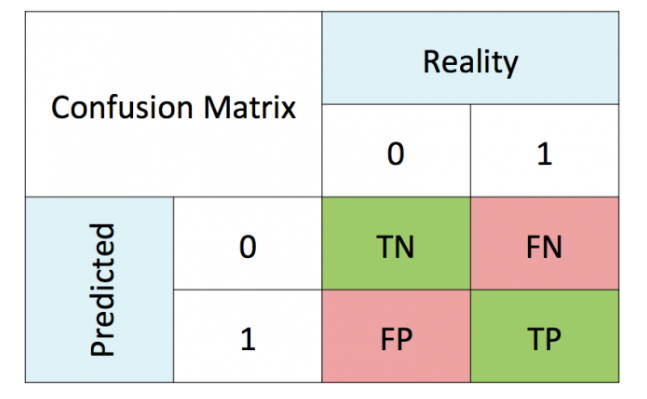

When the prediction is 0, we call it negative, and when it's 1, it is widely accepted to call it positive. Similarly, when the prediction is correct, we say it is True, otherwise it is False. Thus, if in reality someone left the company but was predicted to be a stayer, then we have FN, as the prediction was both False and Negative.

Based on these 4 possibilities, many different metrics are developed in analytics to measure performance of the model.

*Evaluation Metrics 1*

If the target of the prediction is mostly to focuse on thiose whou are churning, than you probably need to have less FN, people who leave in reality but your algorithm is not able to predict it. Hear **recall/sensitivity** score should be used. Higher values of recall correspond lower values of FN

Likewise, if the target under the attention are those who stay, less FP will be the target, which can be achieved with higher **specificity** score

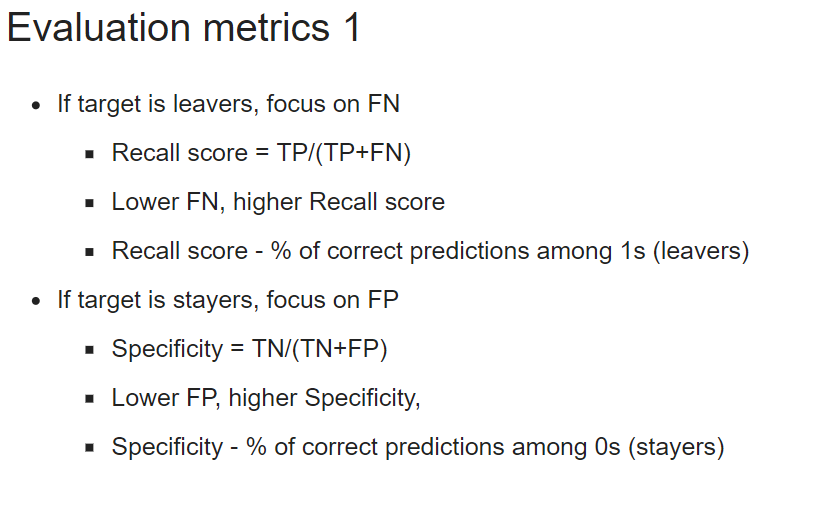

There are some other metrix that can be derived from the same cm.

*Evaluation Metrics 2*

If one is interested in learning what is the percentage of people who truly left the company among those who were predicted to leave, then **precision** score will be handy to use. The reason those scores are important is that general accuracy is not providing info about separate classes. 

e.g. 76% are stayers in the model, so if you just say 'everybody is staying' we will have 76% accuracy prediction. But in terms of recall, we will have low value, as everybody whou churned will be wrongly classified. However, sometimes those scores are very similar and are difficult to differenciate in between.

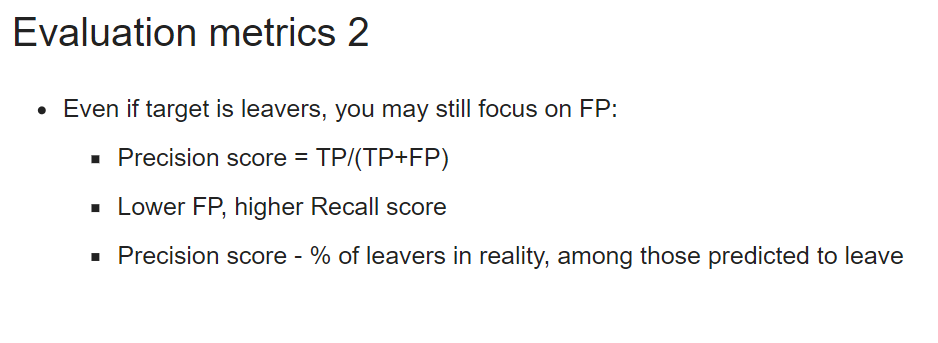

In [27]:
# Import the function to calculate precision score
from sklearn.metrics import precision_score

# Predict whether employees will churn using the test set
prediction = model.predict(features_test)

# Calculate precision score by comparing target_test with the prediction
precision_score(target_test, prediction)

0.9387755102040817

In [28]:
# Import the function to calculate recall score
from sklearn.metrics import recall_score

# Use the initial model to predict churn
prediction = model.predict(features_test)

# Calculate recall score by comparing target_test with the prediction
recall_score(target_test, prediction)

0.9636163175303197

**Targeting more than 1 class only (died, lived)**

As the endpoint objective is to develop a model that will correctly predict churn, recall sore seems to be our target. However, recall alone is not enough, as by only targeting one class, we may have dramatically low accuracy for the other. Thus the general rule is to use a measure that **is not** concentrated on one class alone. 

**If our target are leavers, we would concentrate on recall, if stayers, tham on specificity. BUTTTT**
If the target is to haev good predictions on both, then probably the best choice is to use **AUC** score. AUC stands for Area Under Curve and is basically a compound measure that is maximizes when both reacll and specificity are maximized. To calculate AUC score, one needs to place Recall on vertical, and 1-Spceificity on horizontal axis and dwar the Blue curve in the graph, which is called **ROC**.  

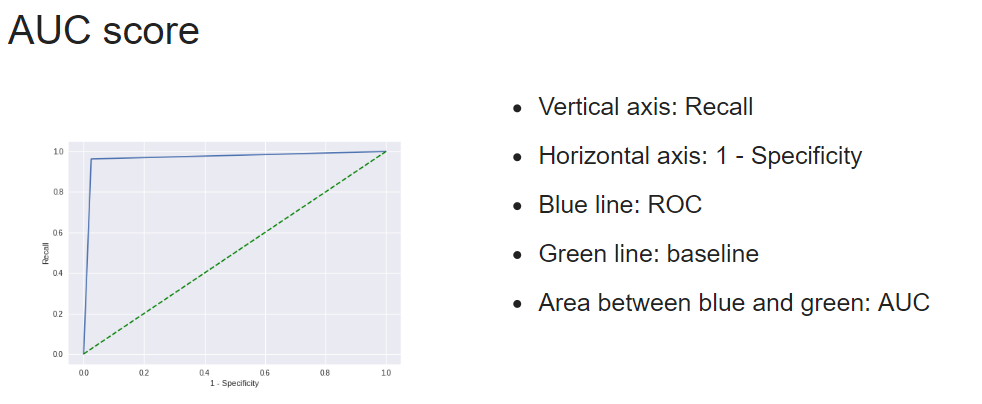

The area between TOC that we obtained and the green diagonla line that a random prediction coul dobtain is the AUC score. Using AUC as a target to maximize, the model will try to correctly classify both 1s and 0s keeping an eye on recall and specificity at the same time. 

In [29]:
# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# Use initial model to predict churn (based on features_test)
prediction = model.predict(features_test)

# Calculate ROC/AUC score by comparing target_test with the prediction
roc_auc_score(target_test, prediction)

0.9717835368868624

# Class Imbalanced

General accuracy score is a good choice only if classes in the dataset are balanced. However, class imbalance may lead to higher acc score, when in fact our model is failing to correctly predict churn. Here is where we need evaluation metrics other than accuracy score.

While those other metrics are more robust and informative, they only partially solve the class imbalance preoblem. To solve it, what we can do is to change prior probabilities. As can be noted here, the Gini index was the objective of our DT to minimize and it was calculated based on probabilities o fbeing 1 or 0. As we have no other onfo about probs, in the very begining, when the tree just starts to grow, in order to calculate the Gini index, it takes proprtions of 0s and 1s as probabilities in Gini formula. As a result, Class 0, which are stayersm becomes more influential as they are 76% of the observations in our dataset. 

**This is the reason our algorithm was able to correctly predict 0s but not 1s.** To solve it, we just need to tell Python to balance class weights which will make probability of both being 0 and 1 equal to 50%.

This will probably negatively affect the general accuracy as a result of increased Gini, but AUC and especially Recall should likely be improved, as now both classes are equally important.

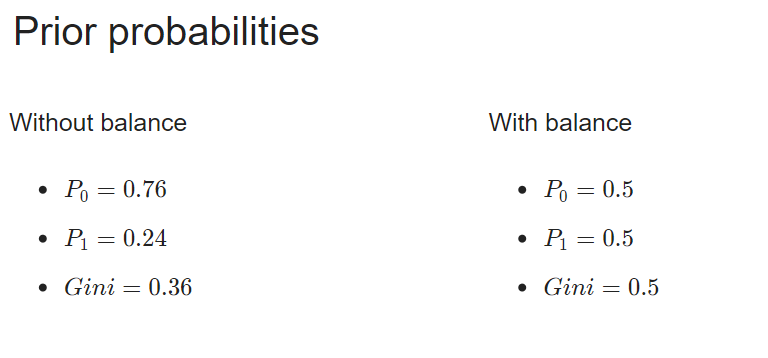

In [30]:
# Initialize the DecisionTreeClassifier 
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

# Fit the model
model_depth_5_b.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_depth_5_b.score(features_test,target_test)*100)

93.92


In [31]:
# Print the recall score
print(recall_score(target_test,prediction))
# Print the ROC/AUC score
print(roc_auc_score(target_test,prediction))

# Initialize the model
model_depth_7_b = DecisionTreeClassifier(class_weight="balanced", max_depth=7, random_state=42)
# Fit it to the training component
model_depth_7_b.fit(features_train,target_train)
# Make prediction using test component
prediction_b = model_depth_7_b.predict(features_test)
# Print the recall score for the balanced model
print(recall_score(target_test, prediction_b))
# Print the ROC/AUC score for the balanced model
print(roc_auc_score(target_test, prediction_b))

0.9636163175303197
0.9717835368868624
0.9305402425578831
0.9555972405191809


**How we decide whether max depth of the tree should be set to 4 or 6 or 10 or any other avlue?**

We just try different values and find the one that provides the best possible predictions. Max_depth, min_sample_size and similar other parameters that need to be tuned to find the best value are known as hyperparameters (smth that is written in the brackets). To find the optimal values for those hyperparameters, one needs to creat a grid, a list of appliable values that might be tested and then search among those values the one that achieves highest accuracy. 

**GridSearch**

e.g. **max_depth** should not be attain very high values, as the tree will start to overfit, but low values are not acceptable as well, as they may provide biased and less acurate predictions.

While train/test split ensures that the model does not overfit training component, hyperparameter tuning may result in overfiting the test component.

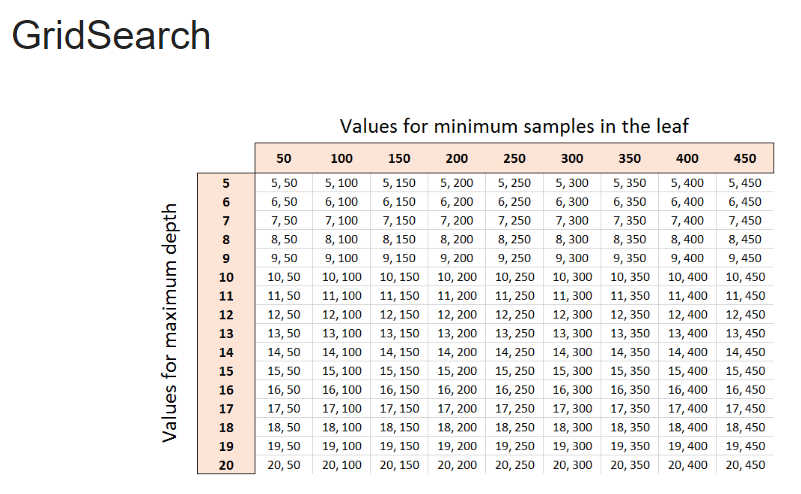

**Cross-Validation**

As a solution, one is encouraged to validate the model on different test components, which is achieving using **cross validation**. The latter is general case of train/test split, as it splits data into **k** components or folds, where each component has the opportunity of being the **test component**.

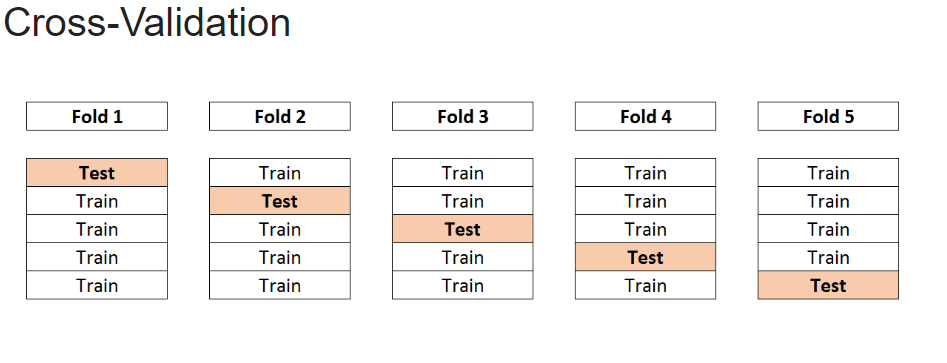

Having different folds ensures that our model doesn't overfit the test component. 

In [32]:
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model,features,target,cv=10))

[0.98467688 0.988      0.97133333 0.96333333 0.956      0.982
 0.988      0.99133333 1.         1.        ]


In [33]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [34]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


**Important Features**

One of the main reasons we chose to use DT algorithm is that it provides interpreability. We can not only visualize and explain it, but also understand what are the important features that drive decision to leave the company. 

Fortunately, once DT is developed, sklearn can easily calculate feature importances. The latter is equal ti the relative decrease on Gini due to the selected feature. Once the calculation is done for all features, the values are rescaled to **sum up to 100%**. As a result, higher percantage speakes about the **feature being more important**.



Note to the exc. below

**Sorting important features**

Among other things, Decision Trees are very popular because of their interpretability. Many models can provide accurate predictions, but Decision Trees can also quantify the effect of the different features on the target. Here, it can tell you which features have the strongest and weakest impacts on the decision to leave the company. In sklearn, you can get this information by using the feature_importances_ attribute.

In this exercise, you're going to get the quantified importance of each feature, save them in a pandas DataFrame (a Pythonic table), and sort them from the most important to the less important. The **model_ best** Decision Tree Classifier used in the previous exercises is available in your workspace, as well as the features_test and features_train variables.

pandas has been imported as pd.

**Selecting important features**

In this exercise, your task is to select only the most important features that will be used by the final model. Remember, that the **relative importances** are saved in the column importance of the DataFrame called relative_importances.

In [35]:
# Calculate feature importances
feature_importances = model_best.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an indnex
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

NameError: name 'model_best' is not defined

In [36]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]

NameError: name 'relative_importances' is not defined

In [37]:
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth=8, min_samples_leaf=150, class_weight='balanced', random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print(recall_score(target_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(target_test, prediction_best) * 100)


NameError: name 'features_train_selected' is not defined